# Fine-tuning model

# ImageNet
[ImageNet](http://www.image-net.org/) is a research project to develop a large database of images with annotations, e.g. images and their descriptions.

The images and their annotations have been the basis for an image classification challenge called the [ImageNet Large Scale Visual Recognition Challenge](http://www.image-net.org/challenges/LSVRC/) or ILSVRC since 2010. The result is that research organizations battle it out on pre-defined datasets to see who has the best model for classifying the objects in images.

>The ImageNet Large Scale Visual Recognition Challenge is a benchmark in object category classification and detection on hundreds of object categories and millions of images. The challenge has been run annually from 2010 to present, attracting participation from more than fifty institutions.

[— ImageNet Large Scale Visual Recognition Challenge, 2015.](https://arxiv.org/abs/1409.0575)

For the classification task, images must be classified into one of 1,000 different categories.

For the last few years very deep convolutional neural network models have been used to win these challenges and results on the tasks have exceeded human performance.

<img src="VGGIMT.png" style="zoom:80%" />

# The Oxford VGG Models

Researchers from the [Oxford Visual Geometry Group](http://www.robots.ox.ac.uk/~vgg/), or VGG for short, participate in the ILSVRC challenge.

In 2014, convolutional neural network models (CNN) developed by the VGG [ won the image classification tasks.](http://imagenet.org/challenges/LSVRC/2014/results)

<img src="VGG_1.png" style="zoom:100%" />

After the competition, the participants wrote up their findings in the paper:

>[Very Deep Convolutional Networks for Large-Scale Image Recognition, 2014.](https://arxiv.org/abs/1409.1556)

They also made their models and learned weights [available online](http://www.robots.ox.ac.uk/~vgg/research/very_deep/).

This allowed other researchers and developers to use a state-of-the-art image classification model in their own work and programs.

This helped to fuel a rash of [transfer learning](https://machinelearningmastery.com/transfer-learning-for-deep-learning/) work where pre-trained models are used with minor modification on wholly new predictive modeling tasks, harnessing the state-of-the-art feature extraction capabilities of proven models.

VGG released two different CNN models, specifically a 16-layer model and a 19-layer model.

# Develop a Simple Photo Classifier
First, we need an image we can classify.

You can download a random photograph of a coffee mug from Flickr [here](https://www.flickr.com/photos/jfanaian/4994221690/).

<img src="mug.jpg" style="zoom:40%" />

Download the image and save it to your current working directory with the filename ‘mug.jpg‘.

## 2. Load the VGG Model
Load the weights for the VGG-16 model, as we did in the previous section.

In [1]:
from keras.applications.vgg16 import VGG16
# load the model
model = VGG16()

model.summary()

Using TensorFlow backend.
/Users/Tommy/opt/anaconda3/envs/python36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/Tommy/opt/anaconda3/envs/python36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/Tommy/opt/anaconda3/envs/python36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/U

Instructions for updating:
Colocations handled automatically by placer.
553467904/553467096 [==============================] - 512s 1us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)  

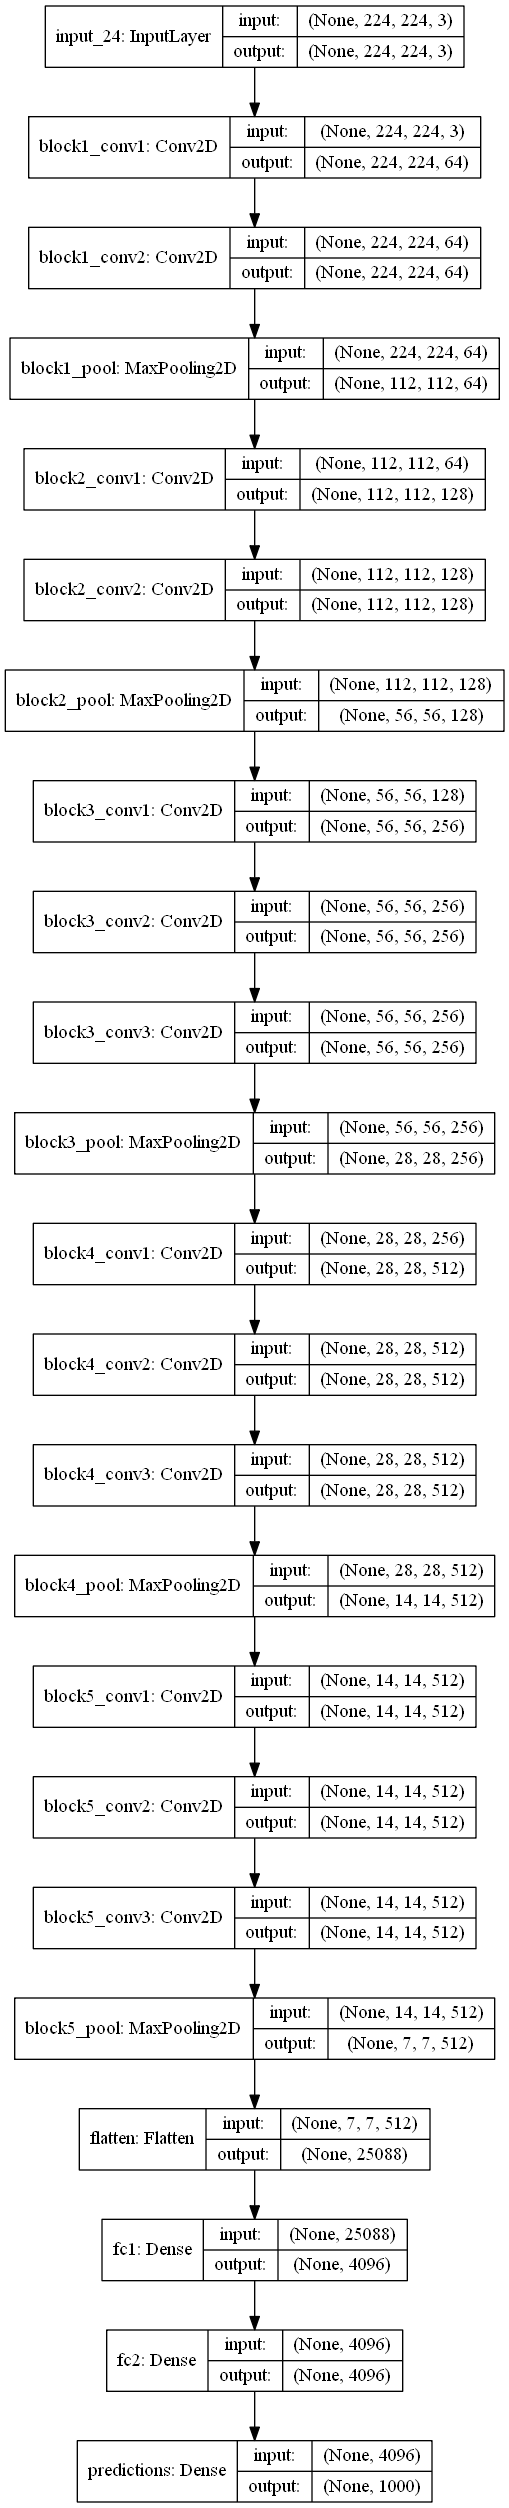

In [75]:
from keras.utils import plot_model
plot_model(model, to_file='model1.png', show_shapes='True')

<img src="VGG16_image.png" style="zoom:50%" />

The VGG() class takes a few arguments that may only interest you if you are looking to use the model in your own project, e.g. for transfer learning.

>**include_top (True)**: Whether or not to include the output layers for the model. You don’t need these if you are fitting the model on your own problem.  
**weights (‘imagenet‘)**: What weights to load. You can specify None to not load pre-trained weights if you are interested in training the model yourself from scratch.  
**input_tensor (None)**: A new input layer if you intend to fit the model on new data of a different size.  
**input_shape (None)**: The size of images that the model is expected to take if you change the input layer.  
**pooling (None)**: The type of pooling to use when you are training a new set of output layers.  
**classes (1000)**: The number of classes (e.g. size of output vector) for the model.

## 3. Load and Prepare Image

First, we can use the load_img() function to load the image and resize it to the required size of 224×224 pixels.

In [76]:
from keras.preprocessing.image import load_img
# load an image from file
image = load_img('mug.jpg', target_size=(224, 224))

Next, we can convert the pixels to a NumPy array so that we can work with it in Keras. We can use the img_to_array() function for this.

In [77]:
from keras.preprocessing.image import img_to_array
# convert the image pixels to a numpy array
image = img_to_array(image)
print(image.shape)

(224, 224, 3)


The network expects one or more images as input; that means the input array will need to be 4-dimensional: samples, rows, columns, and channels.

We only have one sample (one image). We can reshape the array by calling reshape() and adding the extra dimension.

In [78]:
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
print(image.shape)

(1, 224, 224, 3)


Next, the image pixels need to be prepared in the same way as the ImageNet training data was prepared. Keras provides a function called preprocess_input() to prepare new input for the network.

In [79]:
from keras.applications.vgg16 import preprocess_input
# prepare the image for the VGG model
image = preprocess_input(image)
print(image.shape)

(1, 224, 224, 3)


We are now ready to make a prediction for our loaded and prepared image.

# 4. Make a Prediction
We can call the predict() function on the model in order to get a prediction of the probability of the image belonging to each of the 1000 known object types.

In [80]:
# predict the probability across all output classes
yhat = model.predict(image)
yhat.shape

(1, 1000)

Nearly there, now we need to interpret the probabilities.

# 5. Interpret Prediction
Keras provides a function to interpret the probabilities called decode_predictions().

It can return a list of classes and their probabilities in case you would like to present the top 3 objects that may be in the photo.

We will just report the first most likely object.

In [81]:
from keras.applications.vgg16 import decode_predictions

# convert the probabilities to class labels
label = decode_predictions(yhat)
print(label[0])
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print(label[1])
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

[('n03063599', 'coffee_mug', 0.7871468), ('n07930864', 'cup', 0.068306014), ('n03063689', 'coffeepot', 0.06695573), ('n04398044', 'teapot', 0.026542474), ('n03950228', 'pitcher', 0.02074896)]
coffee_mug (78.71%)


# Complete Example
Tying all of this together, the complete example is listed below:

In [82]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

# load the model
model = VGG16()

# load an image from file
image = load_img('mug.jpg', target_size=(224, 224))

# convert the image pixels to a numpy array
image = img_to_array(image)

# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

# prepare the image for the VGG model
#Pre-process the pictures (normalized or whitened) 
# to improve the efficiency of the algorithm,
image = preprocess_input(image)
print(image.shape)

# predict the probability across all output classes
yhat = model.predict(image)
# print(yhat.shape)
####################
# convert the probabilities to class labels
# Keras provides a function decode_predictions () to interpret the 
# prediction vectors that have been obtained. The function returns a 
# list of categories, and the predicted probability of each category
# in the category
######################
label = decode_predictions(yhat)
print(label)
# retrieve the most likely result, e.g. highest probability
label = label[0][1]

# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

(1, 224, 224, 3)
[[('n03063599', 'coffee_mug', 0.7871468), ('n07930864', 'cup', 0.068306014), ('n03063689', 'coffeepot', 0.06695573), ('n04398044', 'teapot', 0.026542474), ('n03950228', 'pitcher', 0.02074896)]]
cup (6.83%)


Running the example, we can see that the image is correctly classified as a “coffee mug” with a 75% likelihood.